<a href="https://colab.research.google.com/github/codebysumit/handwritten-digit-classification/blob/master/Handwritten_Digit_Recognition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install all departments

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikit-learn
!pip install seaborn
!pip install pandas

## Important all requirements

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import datetime
import math
import seaborn as sn

In [17]:
import pandas as pd

## Import mnist datasets

In [ ]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([X_train, X_test])
Y = np.concatenate([Y_train, Y_test])


x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=(1-TRAIN_RATIO))
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_validation:', x_val.shape)
print('y_validation:', y_val.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (48999, 28, 28)
y_train: (48999,)
x_validation: (14000, 28, 28)
y_validation: (14000,)
x_test: (7001, 28, 28)
y_test: (7001,)


## Visualise dataset

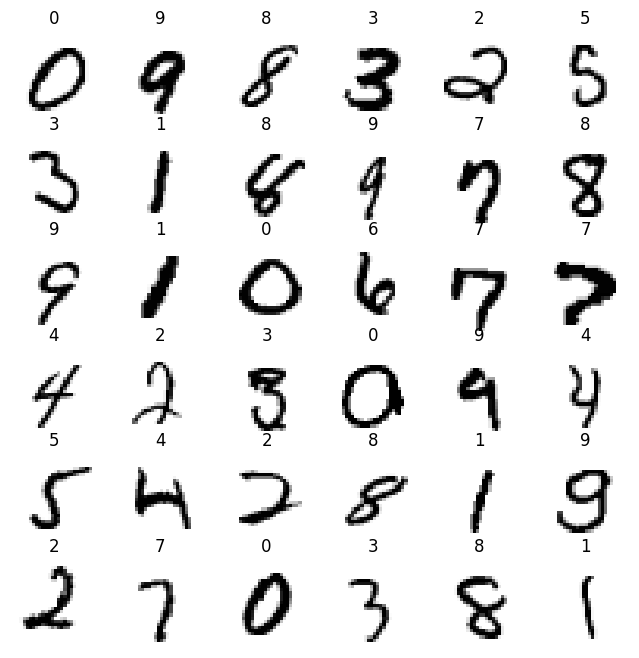

In [ ]:
w = 10
h = 10

fig = plt.figure(figsize=(8, 8))

columns = 6
rows = 6

for i in range(1, columns*rows +1):
    random_index = np.random.randint(y_train.shape[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow( x_train[random_index], cmap='gray_r', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(y_train[random_index])
plt.show()

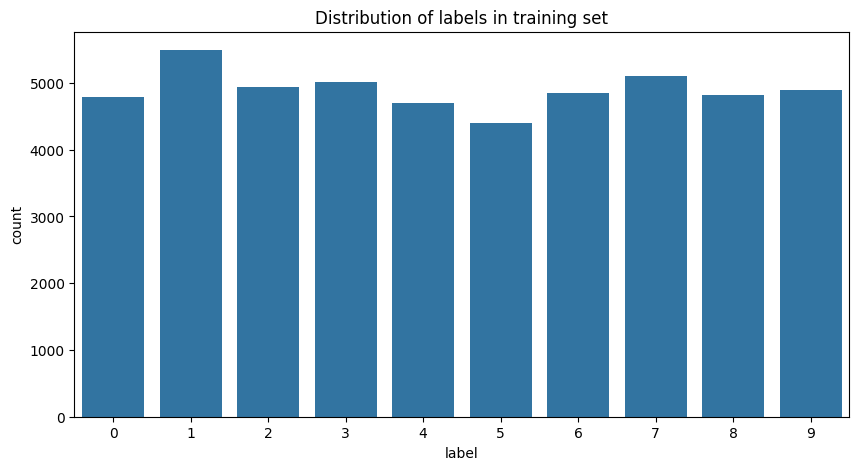

In [14]:
y_train_df = pd.DataFrame(y_train, columns=['label'])

# Figure size
plt.figure(figsize=(10,5))

# Countplot
sn.countplot(x='label', data=y_train_df)
plt.title('Distribution of labels in training set')
plt.show()

## Normalised datasets

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_val = tf.keras.utils.normalize(x_val,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

## Visualizing the data using TSNE

In [ ]:
x_tsne = x_test.reshape(x_test.shape[0], -1)

In [ ]:
tsne = TSNE()
tsne_res = tsne.fit_transform(x_tsne)

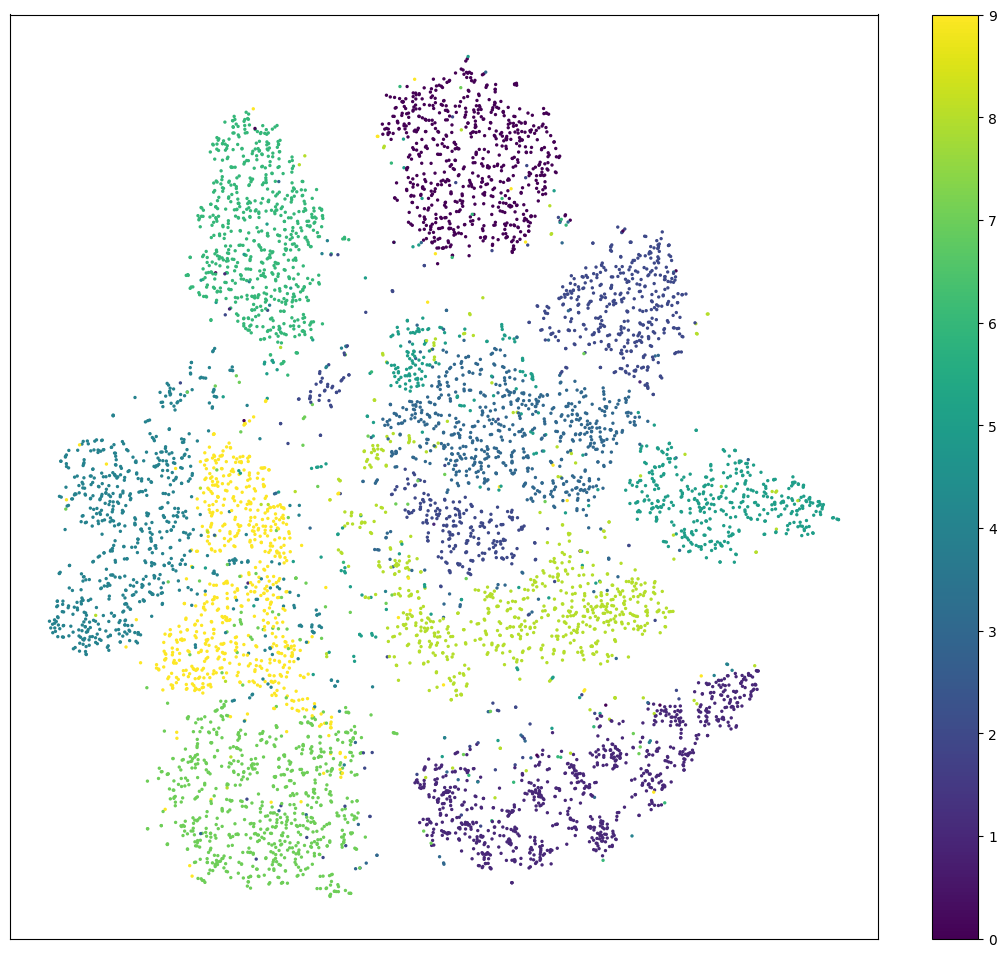

In [ ]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y_test, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

## Reshape dataset

In [ ]:
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

In [ ]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_val.reshape(
    x_val.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (48999, 28, 28, 1)
x_validation_with_chanels: (14000, 28, 28, 1)
x_test_with_chanels: (7001, 28, 28, 1)


## Create CNN model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,146 (340.41 KB)

 Trainable params: 87,146 (340.41 KB)

 Non-trainable params: 0 (0.00 B)

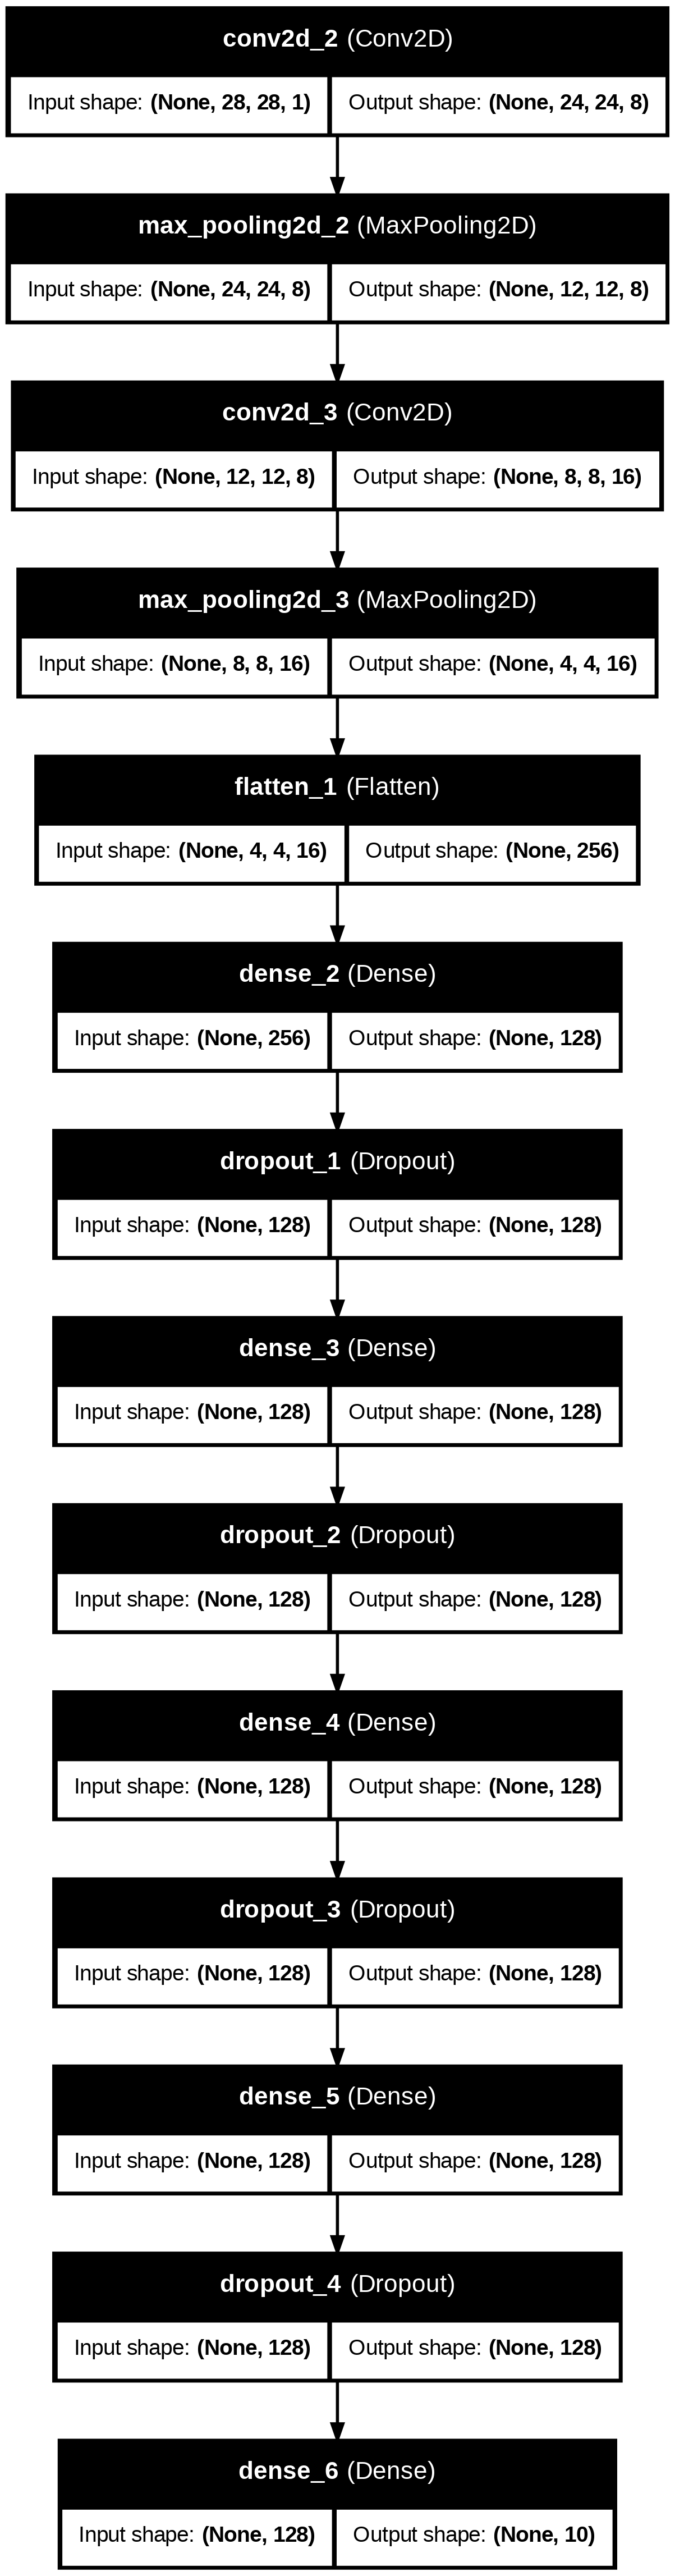

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compiler model

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Training the model

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
training_history = model.fit(
    x_train_with_chanels,
    y_train,
    epochs=20,
    validation_data=(x_validation_with_chanels, y_val),
    callbacks=[tensorboard_callback]
)

Epoch 1/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7733 - loss: 0.6773 - val_accuracy: 0.9699 - val_loss: 0.1020
Epoch 2/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9647 - loss: 0.1245 - val_accuracy: 0.9805 - val_loss: 0.0731
Epoch 3/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9745 - loss: 0.0906 - val_accuracy: 0.9819 - val_loss: 0.0650
Epoch 4/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9810 - loss: 0.0695 - val_accuracy: 0.9836 - val_loss: 0.0582
Epoch 5/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9838 - loss: 0.0583 - val_accuracy: 0.9868 - val_loss: 0.0542
Epoch 6/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9856 - loss: 0.0515 - val_accuracy: 0.9855 - val_loss: 0.0540
Epoch 7/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9858 - loss: 0.0515 - val_accuracy: 0.9869 - val_loss: 0.0543
Epoch 8/20
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9881 -

## Check model accuracy

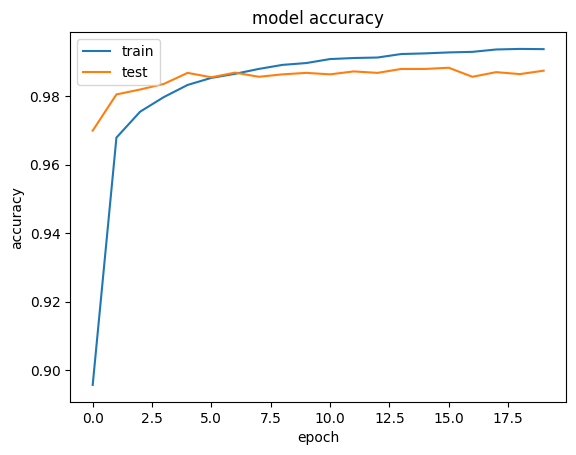

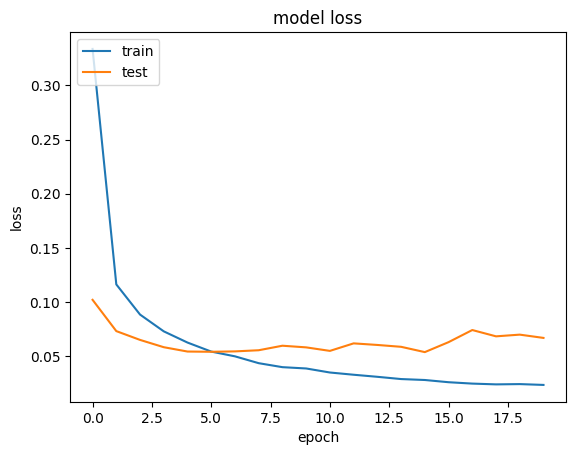

In [ ]:
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
val_loss,val_acc = model.evaluate(x_test_with_chanels,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9874 - loss: 0.0618
loss->  0.06411613523960114 
acc->  0.9878588914871216


## Save and load the model

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

## Visualise validation predicted data on how the digits were written

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_with_chanels])

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (7001, 10)


In [ ]:
predictions = np.argmax(predictions_one_hot, axis=1)

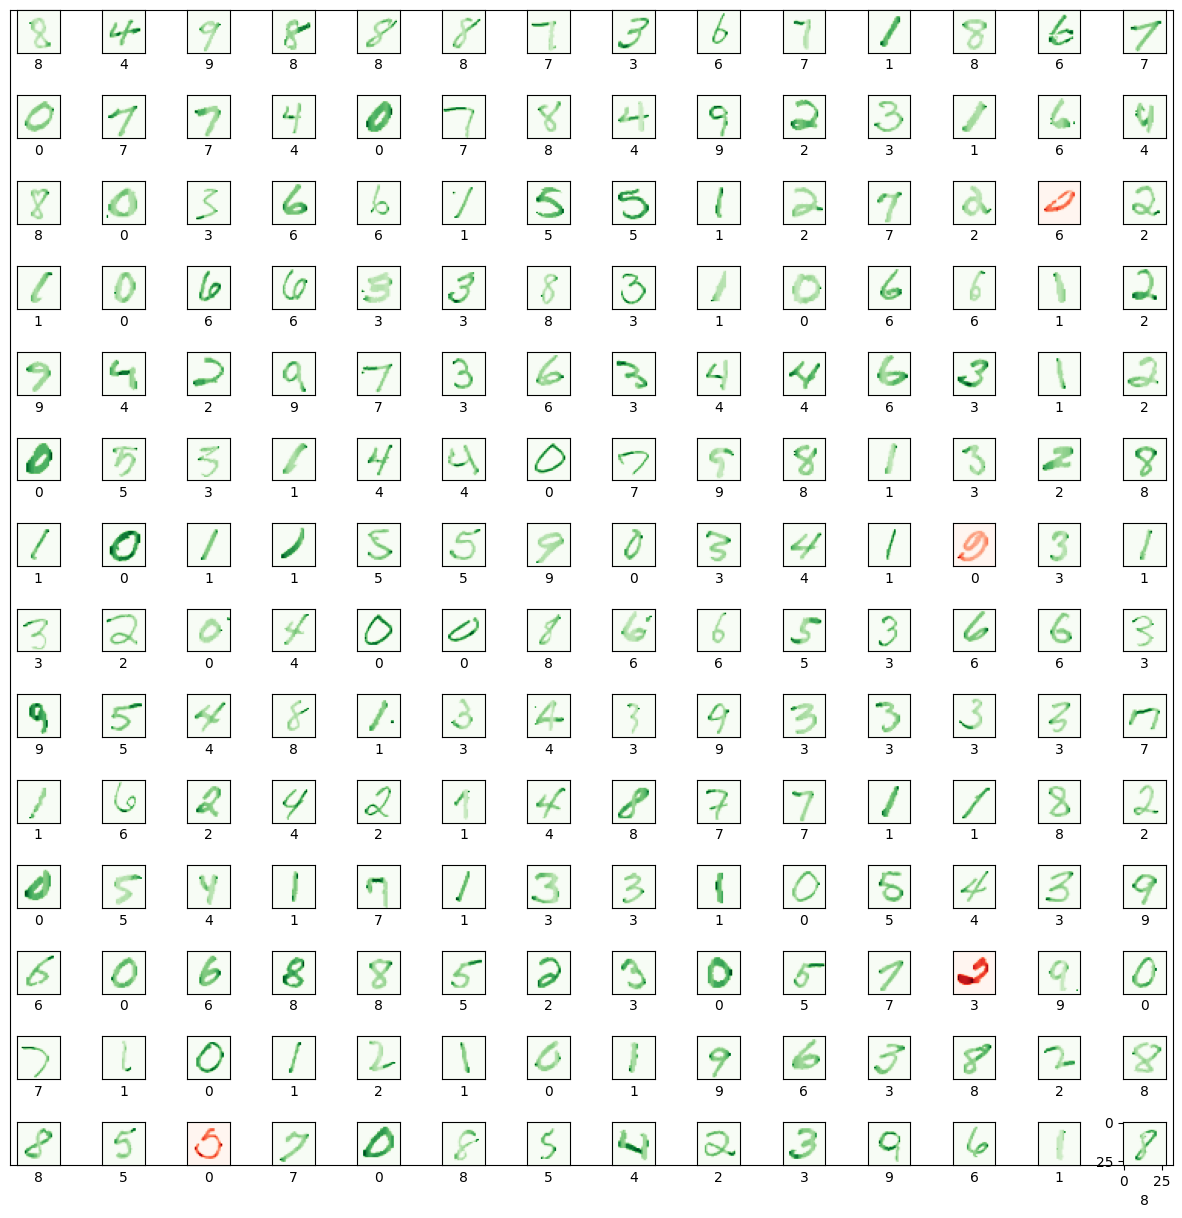

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_with_chanels[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Confusion matrix of test dataset

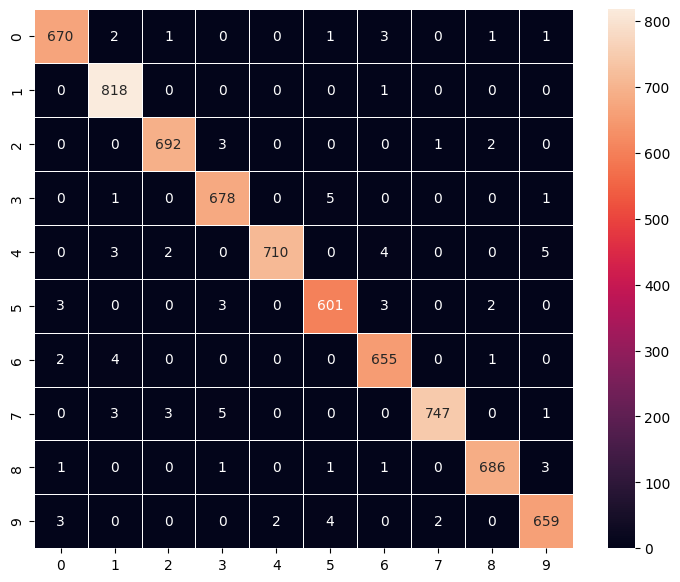

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()